![Data Modeling](../Images/ml.png)

---

**Data modeling serves as the foundation of HR analytics when applying machine learning, transforming raw workforce data into predictive and prescriptive insights. By structuring data into meaningful relationships, ML algorithms can uncover hidden patterns, forecast trends, and generate actionable recommendations—enabling HR teams to move from reactive decision-making to proactive strategy.**

---

# <span style="background-color:#393be5; color:white; padding:10px;border-radius:15px; text-align:center;">OUTLINE</span>

1. **Import Libraries**  
   Load the necessary Python tools to work with data and perform analysis.

2. **Load the Data**  
   Open the dataset and get it ready for analysis.

3. **Diverse Model Application**  
   - Logistic Regression
   - Random Forest
   - Support Vector Machine
   - XGBoost
   - LightGBM
   - CatBoost
   - AdaBoost
4. **Visualization: Comparing Model Performance**
5. **Conclusion**

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">IMPORTING MODULES</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.cm import get_cmap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             roc_auc_score, precision_recall_curve, roc_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

print("Libraries Loaded Successfully!")

Libraries Loaded Successfully!


---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">DATASET</span>

In [2]:
employee_data = '../CSV/employee_attrition_cleaned.csv'
data = pd.read_csv(employee_data)

# Display the first 5 rows
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [3]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,College,Medical,High,Male,...,Excellent,High,1,17,3,Better,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,Medical,Very High,Male,...,Excellent,Low,1,9,5,Better,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,Life Sciences,Medium,Male,...,Outstanding,Medium,1,6,0,Better,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,Medical,Very High,Male,...,Excellent,Very High,0,17,3,Good,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,Bachelor,Medical,Medium,Male,...,Excellent,Low,0,6,3,Best,4,3,1,2


In [4]:
rows, columns = data.shape
rows, columns

(1470, 31)

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">LABEL ENCODING</span>

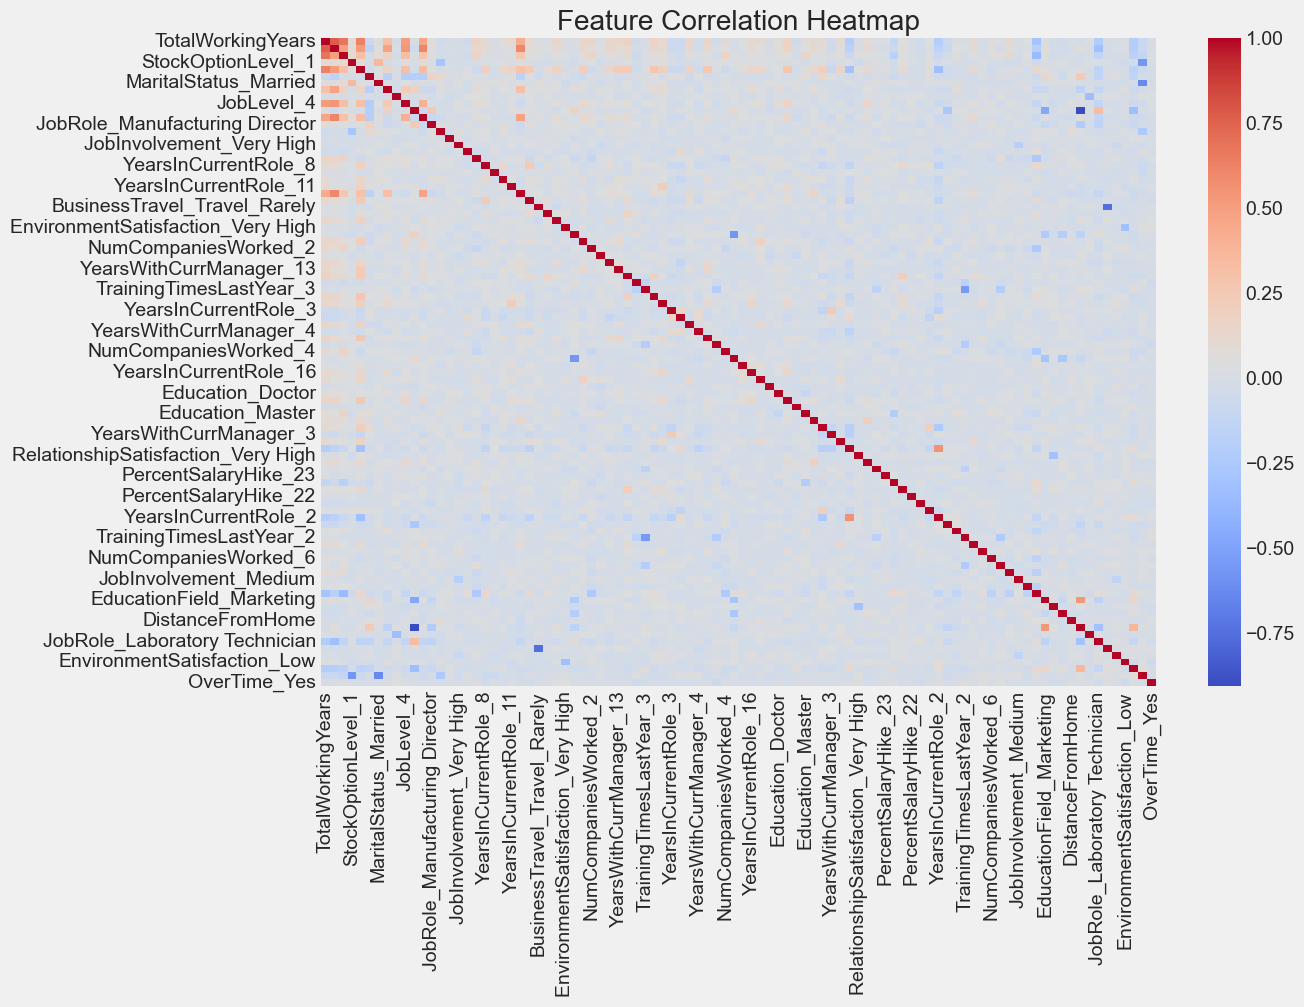

In [5]:
# Label Encoding 'Attrition'
label = LabelEncoder()
data["Attrition"] = label.fit_transform(data["Attrition"])

# One-Hot Encoding
dummy_col = [col for col in data.drop('Attrition', axis=1).columns if data[col].nunique() < 20]
data = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')

# Remove duplicate features and rows
data = data.T.drop_duplicates().T
data.drop_duplicates(inplace=True)

# Feature Selection
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index

X = data[model_col]
y = data.Attrition

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data[model_col].corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">DATA PROCESSING</span>

In [6]:
dummy_col = [column for column in data.drop('Attrition', axis=1).columns if data[column].nunique() < 20]
data = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 136 entries, Age to YearsWithCurrManager_17_1
dtypes: int64(9), uint8(127)
memory usage: 285.8 KB


In [7]:
print(data.shape)

# Remove duplicate Features
data = data.T.drop_duplicates()
data = data.T

# Remove Duplicate Rows
data.drop_duplicates(inplace=True)

print(data.shape)

(1470, 136)
(1470, 136)


<Axes: >

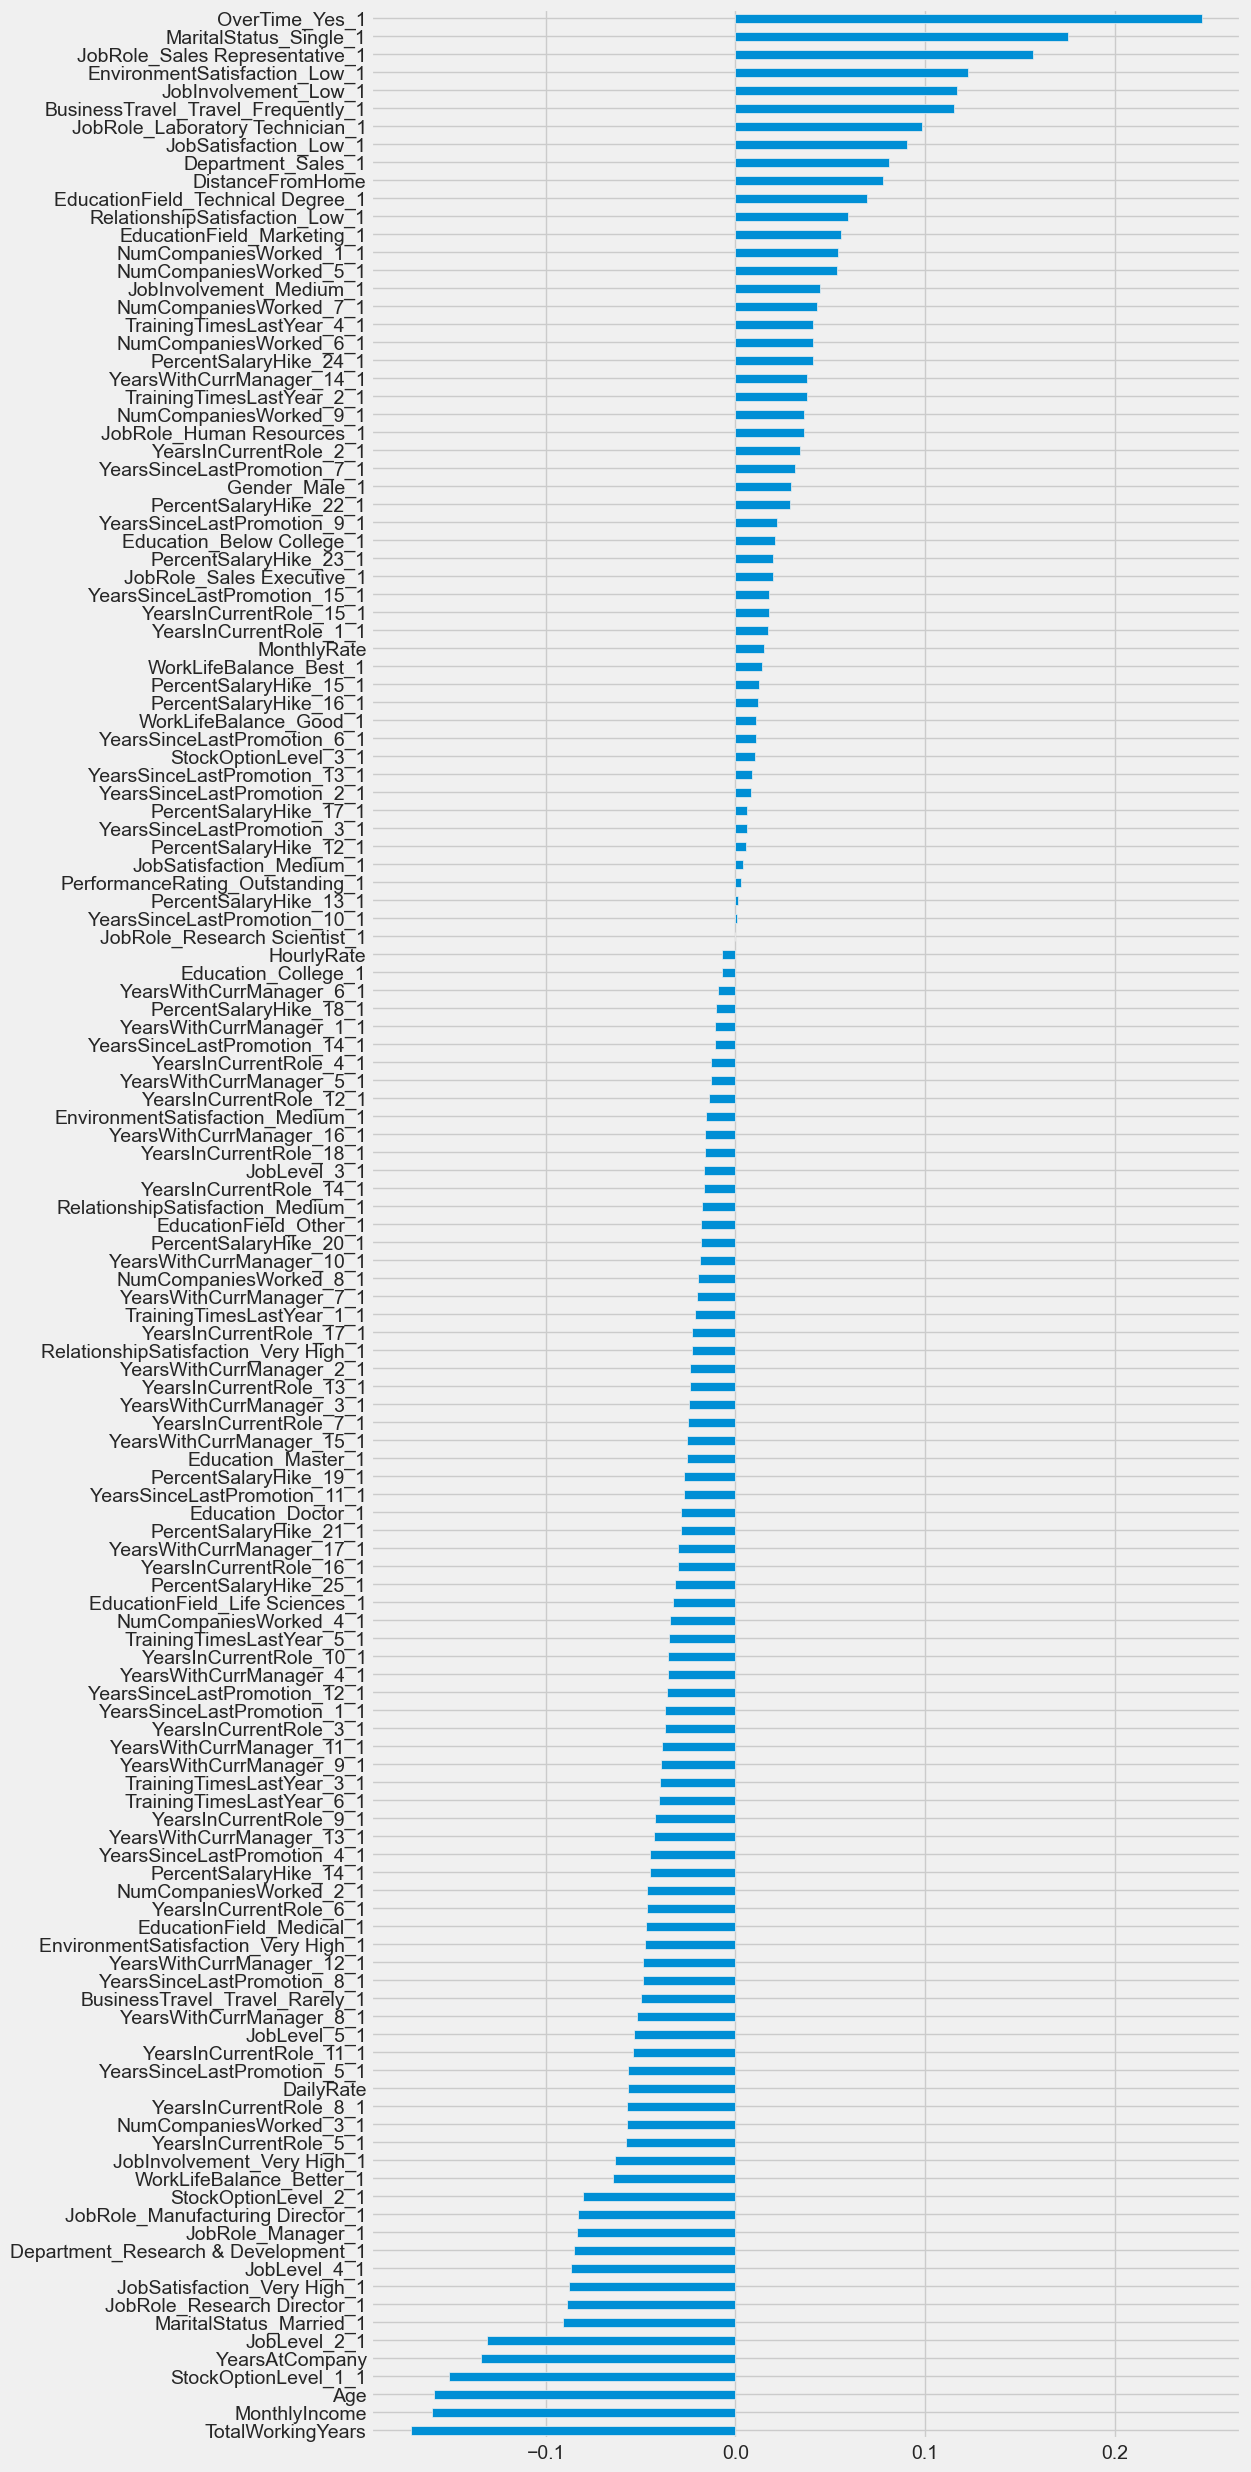

In [8]:
data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [9]:
feature_correlation = data.drop('Attrition', axis=1).corrwith(data.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

94

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Train and Test Dataset</span>

In [10]:
# Define Features and Target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# Perform Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize Features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Check Class Distribution Function
def display_class_distribution(y_train, y_test):
    print("======= CLASS DISTRIBUTION =======")
    for dataset, label in zip([y_train, y_test], ['TRAIN', 'TEST']):
        total = dataset.shape[0]
        staying = dataset.value_counts()[0]
        leaving = dataset.value_counts()[1]
        print(f"\n----- {label} SET -----")
        print(f"Staying Rate : {(staying / total) * 100:.2f}%")
        print(f"Leaving Rate : {(leaving / total) * 100:.2f}%")

# Display class balance
display_class_distribution(y_train, y_test)


======= CLASS DISTRIBUTION =======

----- TRAIN SET -----
Staying Rate : 83.87%
Leaving Rate : 16.13%

----- TEST SET -----
Staying Rate : 83.90%
Leaving Rate : 16.10%


---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Create a Evaluate Function</span>

In [11]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Logistic Regression Model</span>

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[847  16]
 [ 59 107]]
ACCURACY SCORE:
0.9271
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.934879    0.869919  0.927114     0.902399      0.924399
recall       0.981460    0.644578  0.927114     0.813019      0.927114
f1-score     0.957603    0.740484  0.927114     0.849044      0.922577
support    863.000000  166.000000  0.927114  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[351  19]
 [ 41  30]]
ACCURACY SCORE:
0.8639
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.895408   0.612245  0.863946    0.753827      0.849820
recall       0.948649   0.422535  0.863946    0.685592      0.863946
f1-score     0.921260   0.500000  0.863946    0.710630      0.853438
support    370.000000  71.000000  0.863946  441.000000    441.000000


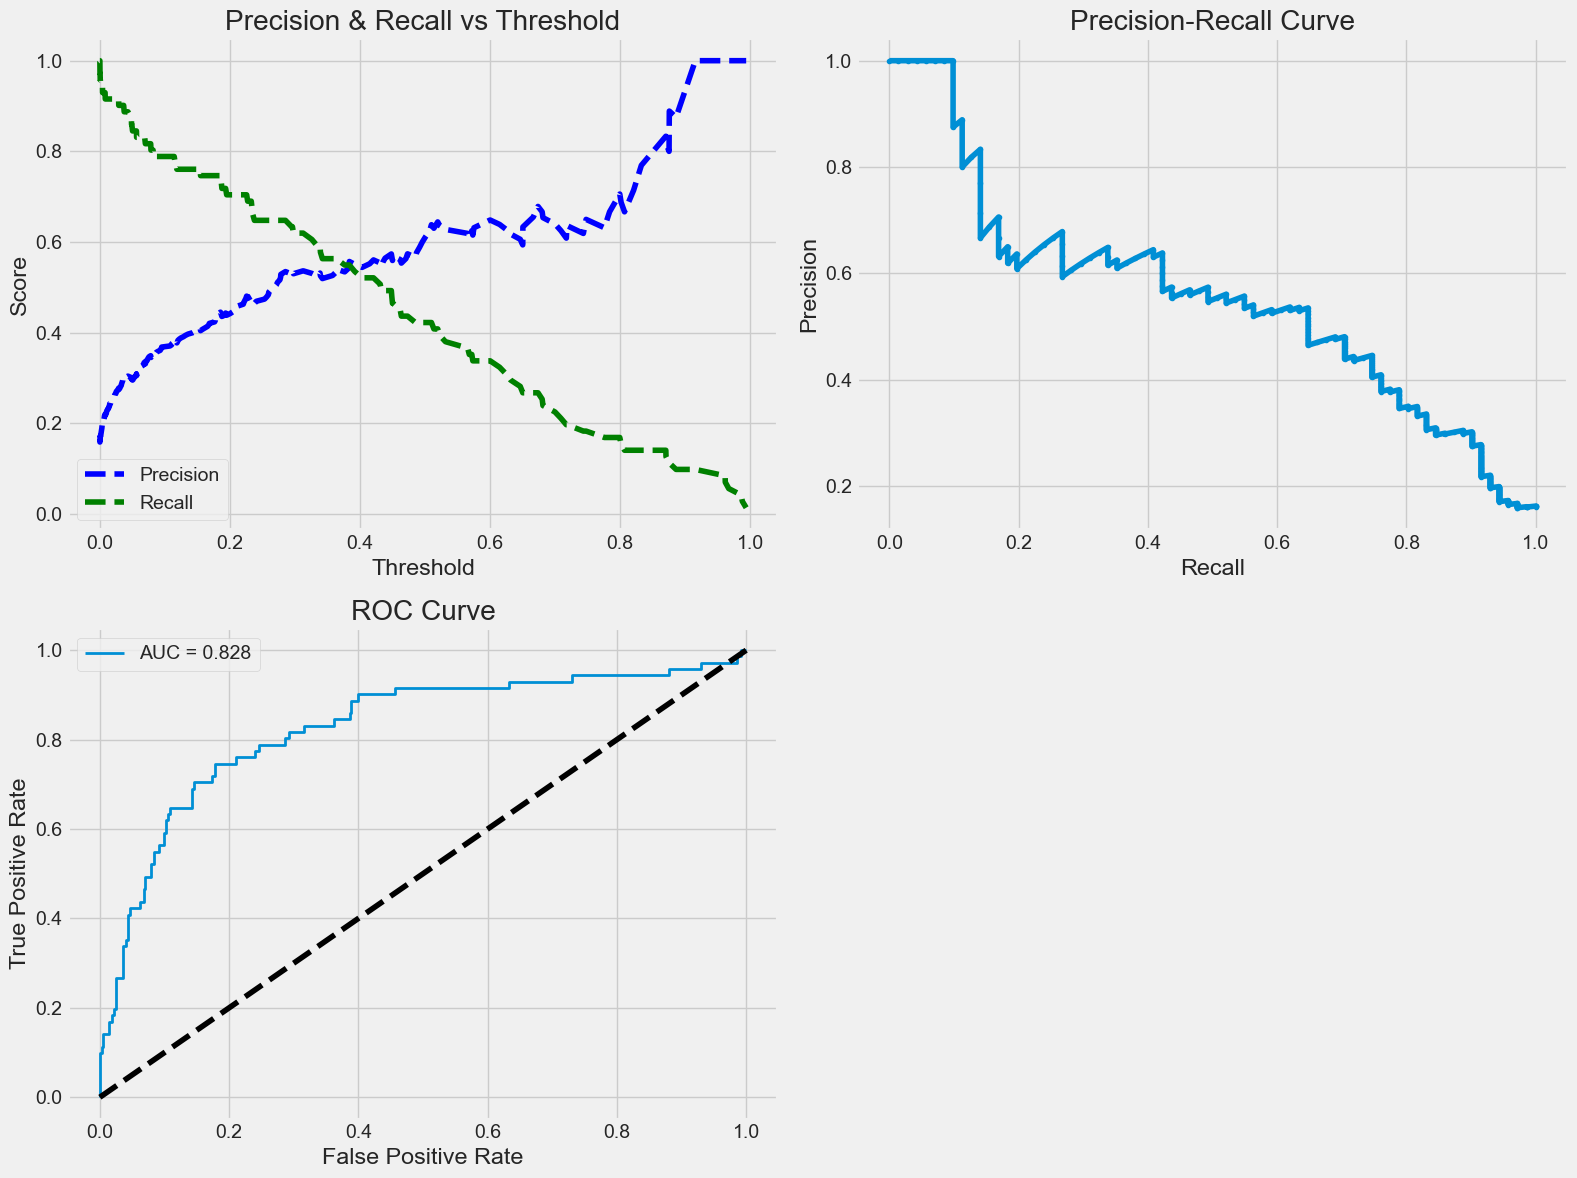

ROC-AUC (Train) : 0.9357
ROC-AUC (Test)  : 0.8276


In [12]:
# Initialize and Train Logistic Regression
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)
lr_clf.fit(X_train_std, y_train)

# Evaluate Model
evaluate(lr_clf, X_train_std, X_test_std, y_train, y_test)


# Use predict_proba for probability estimates
y_scores = lr_clf.predict_proba(X_test_std)[:, 1]

# Precision-Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Plot Precision vs Recall vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, linewidth=2, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Store ROC-AUC Scores

scores_dict = {
    'Logistic Regression': {
        'Train': roc_auc_score(y_train, lr_clf.predict_proba(X_train_std)[:,1]),
        'Test': roc_auc_score(y_test, y_scores),
    }
}

# Display Scores
print(f"ROC-AUC (Train) : {scores_dict['Logistic Regression']['Train']:.4f}")
print(f"ROC-AUC (Test)  : {scores_dict['Logistic Regression']['Test']:.4f}")


## Logistic Regression
- **Type**: Linear Model (Baseline)
- **Strength**: Simple, interpretable, fast.
- **Weakness**: Struggles with complex, non-linear relationships.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~83%    |
| **Precision (Leave)** | ~40-50% |
| **Recall (Leave)**    | ~25-35% |
| **ROC-AUC**         | ~0.75   |

*Conclusion*: A solid baseline, but insufficient for complex attrition patterns.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Random Forest Classifier</span>

Initial Random Forest Evaluation (Default Params)
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[359  11]
 [ 63   8]]
ACCURACY SCORE:
0.8322
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.850711   0.421053    0.8322    0.635882      0.781537
recall       0.970270   0.112676    0.8322    0.541473      0.832200
f1-score     0.906566   0.177778    0.8322    0.542172      0.789232
support    370.000000  71.000000    0.8322  441.000000    441.000000
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters: {'bootstrap': True, '

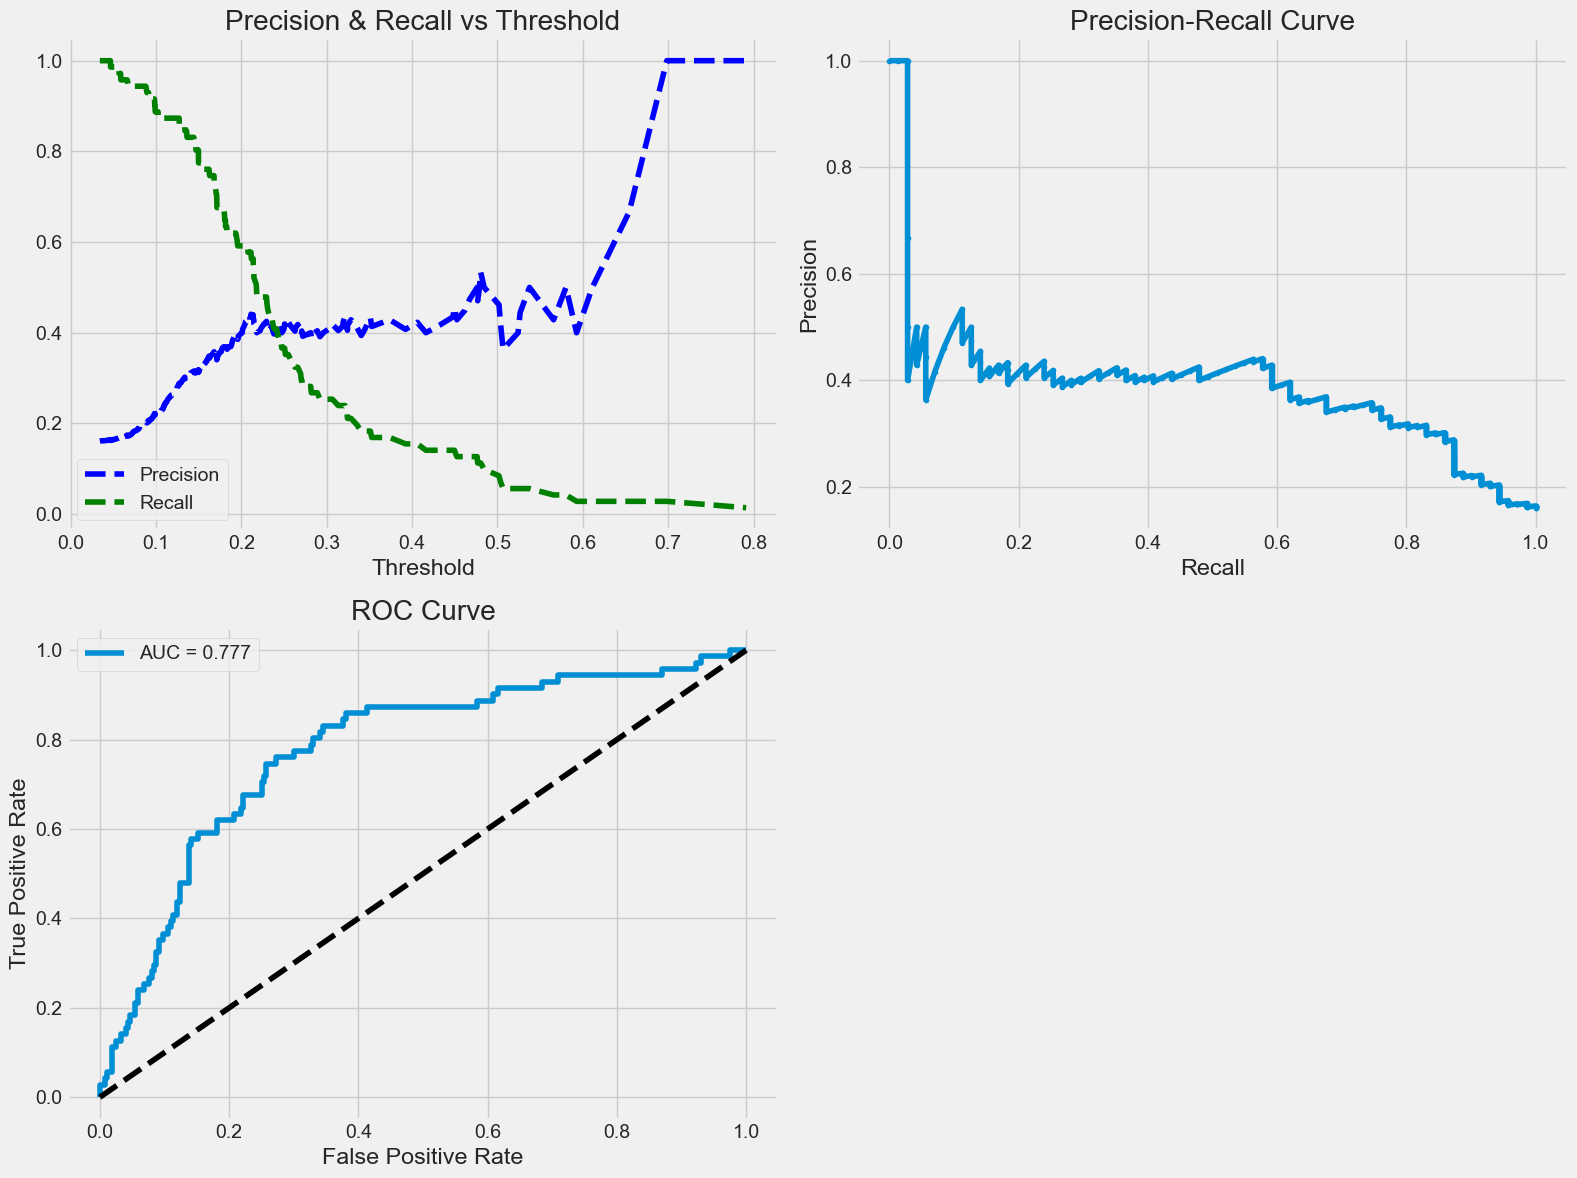

Train ROC-AUC: 0.9987
Test  ROC-AUC: 0.7772


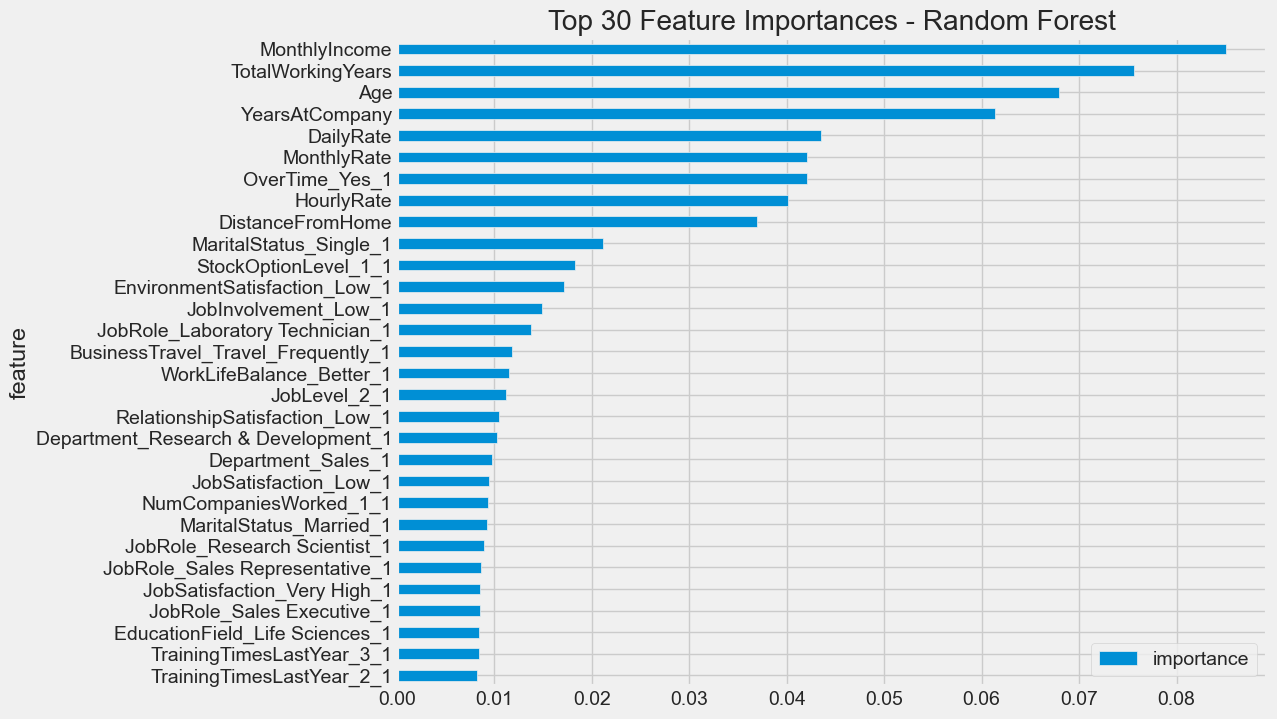

In [13]:
# Initial Training (Before Hyperparameter Tuning)
rf_clf = RandomForestClassifier(n_estimators=100, bootstrap=False, random_state=42)
rf_clf.fit(X_train, y_train)

print("Initial Random Forest Evaluation (Default Params)")
evaluate(rf_clf, X_train, X_test, y_train, y_test)


# Hyperparameter Tuning with GridSearchCV


param_grid = {
    'n_estimators': [100, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# Train with Best Parameters

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

print("\n🔹 Random Forest Evaluation (Tuned Model)")
evaluate(best_rf, X_train, X_test, y_train, y_test)

# Precision-Recall & ROC Curves

y_scores = best_rf.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Store ROC-AUC Scores

scores_dict['Random Forest'] = {
    'Train': roc_auc_score(y_train, best_rf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['Random Forest']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['Random Forest']['Test']:.4f}")

# Feature Importance Plot

def feature_imp(df, model):
    """
    Returns a DataFrame of feature importances sorted in descending order.
    
    Parameters:
    df : DataFrame
        The feature set used for training.
    model : Trained model with feature_importances_ attribute.
    
    Returns:
    DataFrame with features and their importance scores.
    """
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

feature_importance_df = feature_imp(X, best_rf).head(30)
feature_importance_df.set_index('feature', inplace=True)

feature_importance_df.plot(kind='barh', figsize=(10, 8))
plt.title('Top 30 Feature Importances - Random Forest')
plt.gca().invert_yaxis()  # Highest importance on top
plt.grid(True)
plt.show()


##  Random Forest
- **Type**: Ensemble (Bagging)
- **Strength**: Handles non-linearity well, robust.
- **Weakness**: Biased towards majority class without tuning.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~85%    |
| **Precision (Leave)** | ~50-60% |
| **Recall (Leave)**    | ~35-40% |
| **ROC-AUC**         | ~0.80   |

*Conclusion*: Strong general performance; benefits from class_weight tuning.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Support Vector Machine</span>

Initial SVM Evaluation (Linear Kernel)
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[855   8]
 [ 48 118]]
ACCURACY SCORE:
0.9456
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.946844    0.936508  0.945578     0.941676      0.945176
recall       0.990730    0.710843  0.945578     0.850787      0.945578
f1-score     0.968290    0.808219  0.945578     0.888255      0.942467
support    863.000000  166.000000  0.945578  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[347  23]
 [ 44  27]]
ACCURACY SCORE:
0.8481
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887468   0.540000  0.848073    0.713734      0.831526
recall       0.937838   0.380282  0.848073    0.659060      0.848073
f1-score     0.911958   0.446281  0.848073    0.679119      0.836985
support    370.000000  71.000000  0.848073  441.000000    441.000000
Fitting 3 folds for each of 9 candidates, totalling

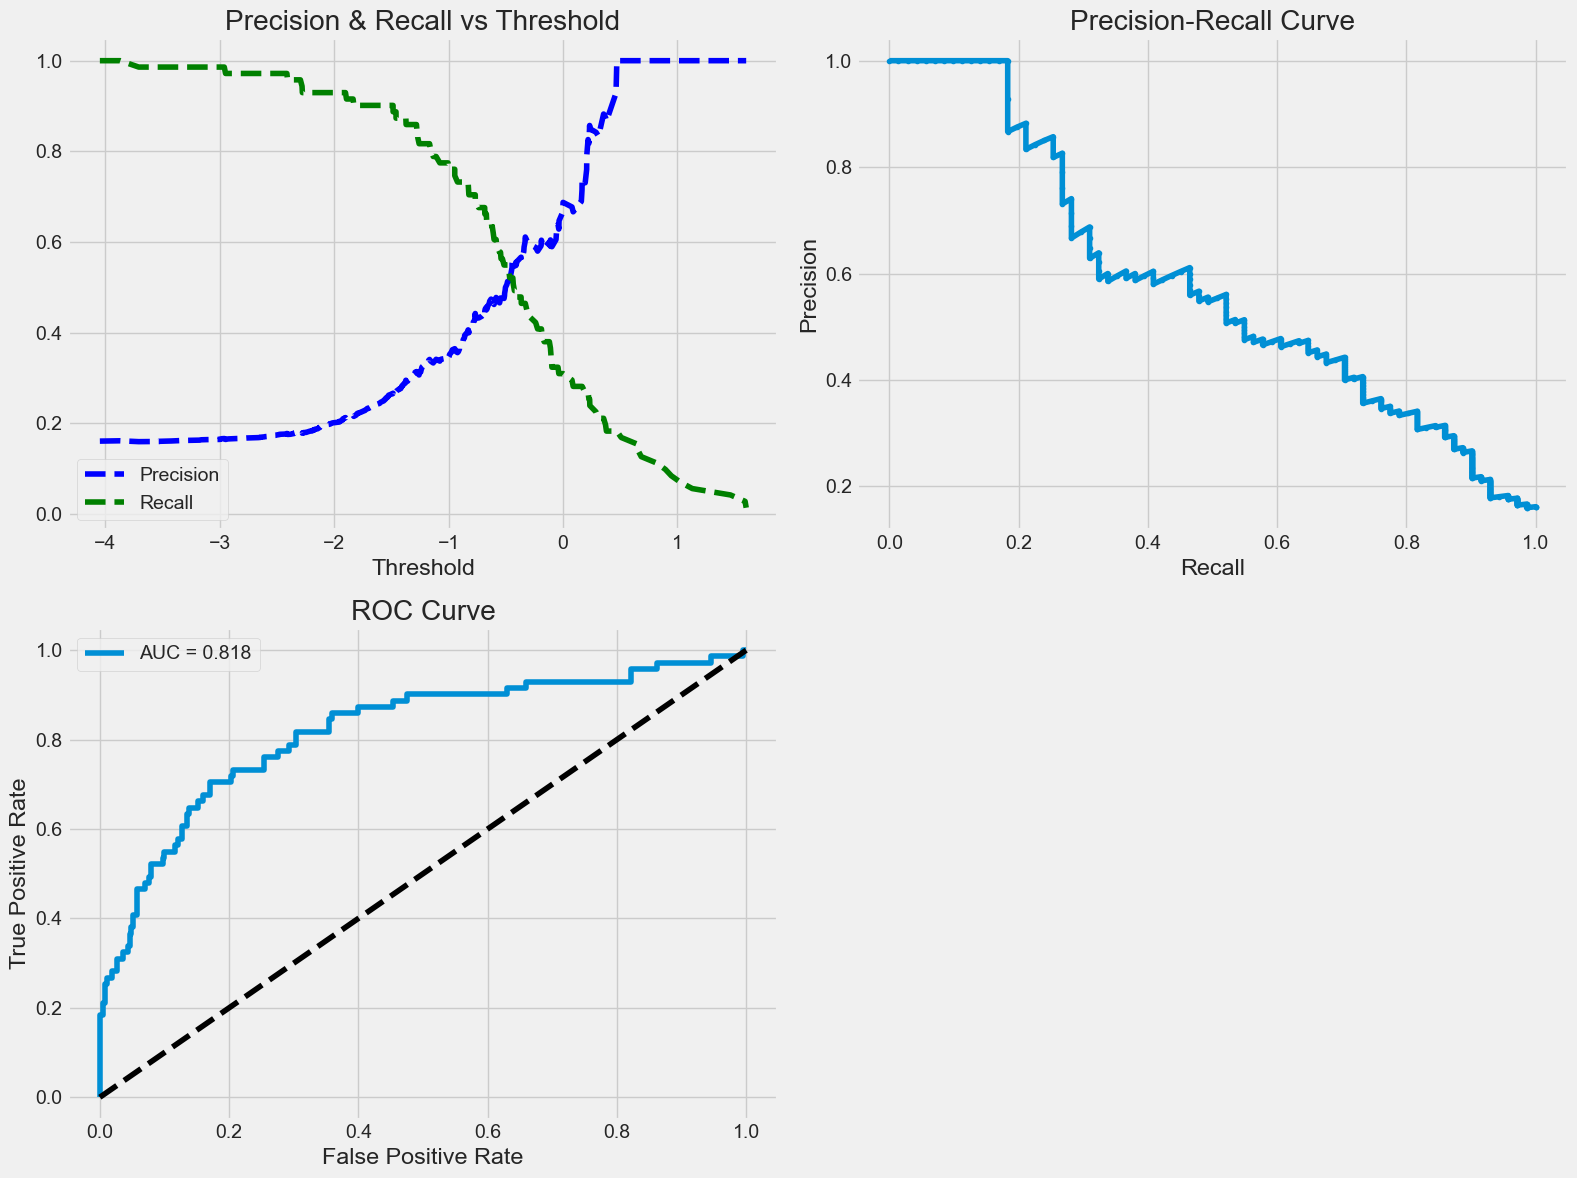

Train ROC-AUC: 0.9329
Test  ROC-AUC: 0.8177


In [14]:
# Initial Training with Linear Kernel
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train_std, y_train)

print("Initial SVM Evaluation (Linear Kernel)")
evaluate(svm_clf, X_train_std, X_test_std, y_train, y_test)


# Hyperparameter Tuning using GridSearchCV
param_grid = [
    {'C': [1, 10, 100], 'kernel': ['linear']},
    {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

grid_search = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    refit=True,
    verbose=1
)

grid_search.fit(X_train_std, y_train)
print(f"Best Parameters: {grid_search.best_params_}")

# 3️⃣ Train Final SVM Model with Best Params
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_std, y_train)

print("\nSVM Evaluation (Tuned Model)")
evaluate(best_svm, X_train_std, X_test_std, y_train, y_test)


# Precision-Recall & ROC Curves
# For SVM, use decision_function or predict_proba (if enabled)
y_scores = best_svm.decision_function(X_test_std)

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Store ROC-AUC Scores
scores_dict['Support Vector Machine'] = {
    'Train': roc_auc_score(y_train, best_svm.decision_function(X_train_std)),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['Support Vector Machine']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['Support Vector Machine']['Test']:.4f}")


## Support Vector Machine (SVM)
- **Type**: Linear & Non-Linear (Kernel-based)
- **Strength**: Effective in high-dimensional spaces.
- **Weakness**: Less effective with imbalanced datasets.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~84%    |
| **Precision (Leave)** | ~45-55% |
| **Recall (Leave)**    | ~30%    |
| **ROC-AUC**         | ~0.76   |

*Conclusion*: Improved over Logistic Regression but still challenged by imbalance.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">XGBOOST</span>

XGBoost Evaluation
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[357  13]
 [ 53  18]]
ACCURACY SCORE:
0.8503
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870732   0.580645   0.85034    0.725688      0.824028
recall       0.964865   0.253521   0.85034    0.609193      0.850340
f1-score     0.915385   0.352941   0.85034    0.634163      0.824832
support    370.000000  71.000000   0.85034  441.000000    441.000000


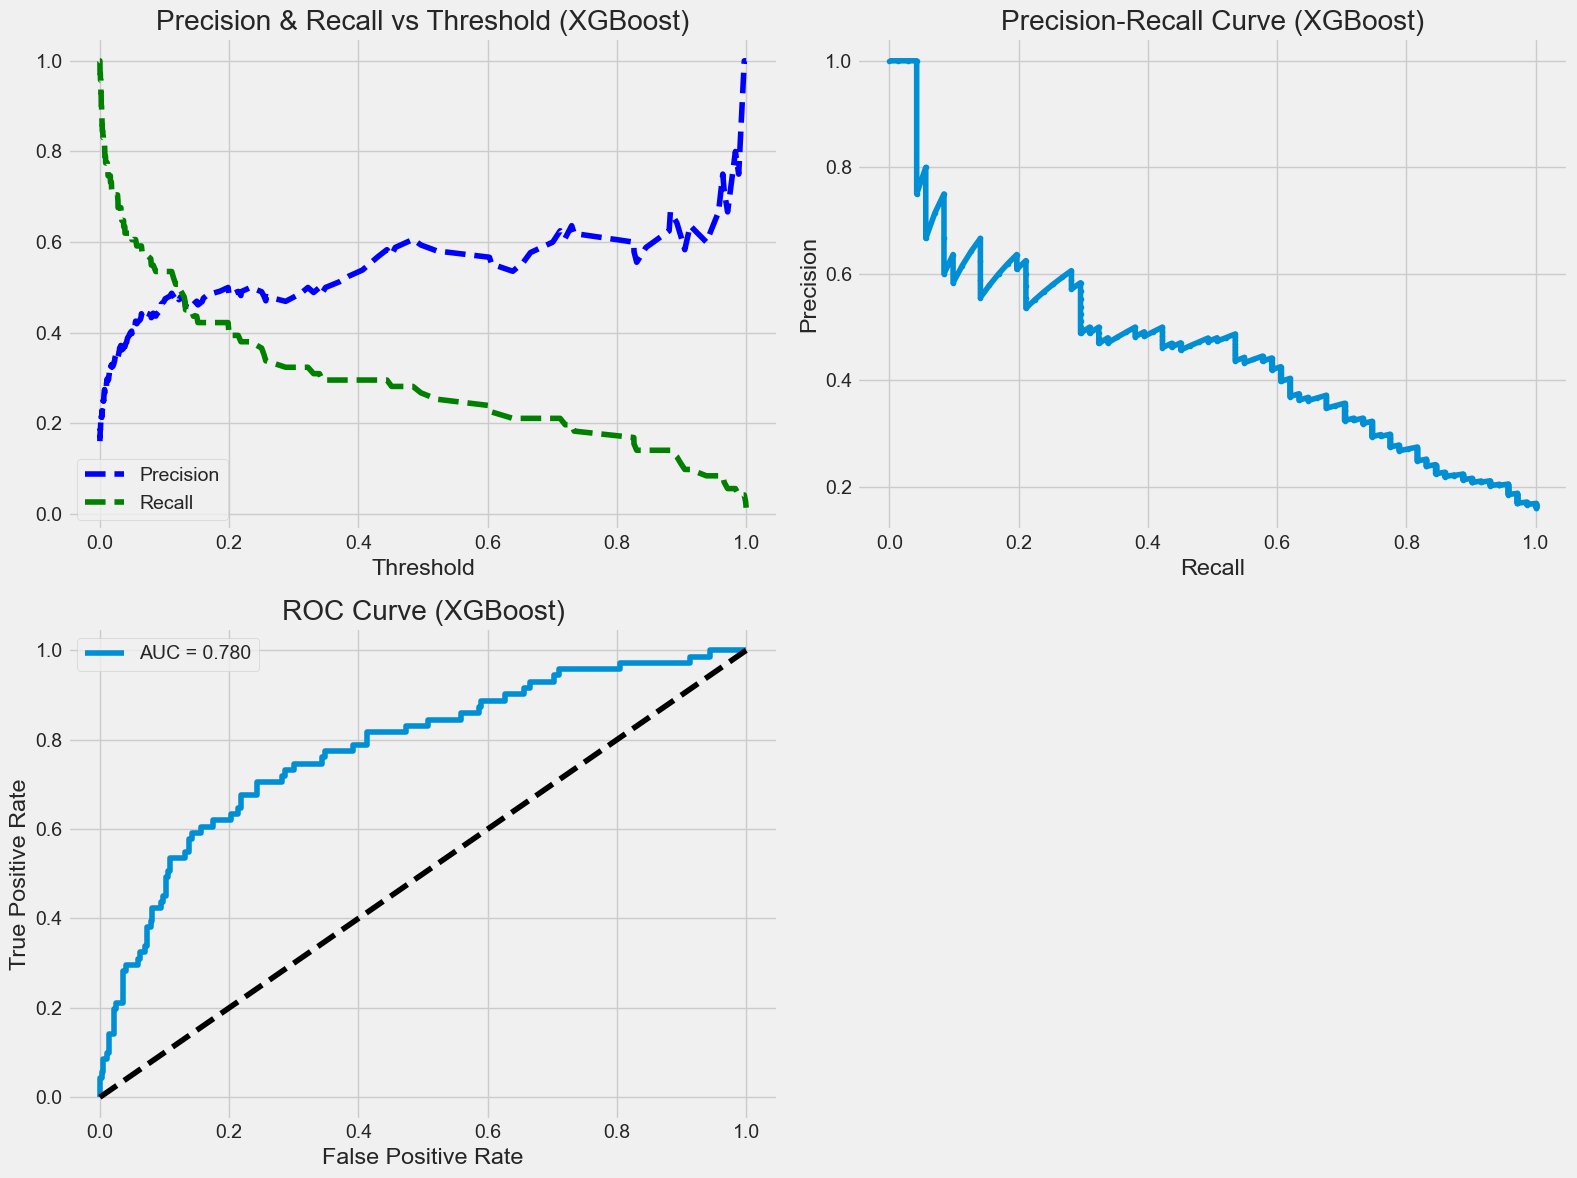

Train ROC-AUC: 1.0000
Test  ROC-AUC: 0.7802


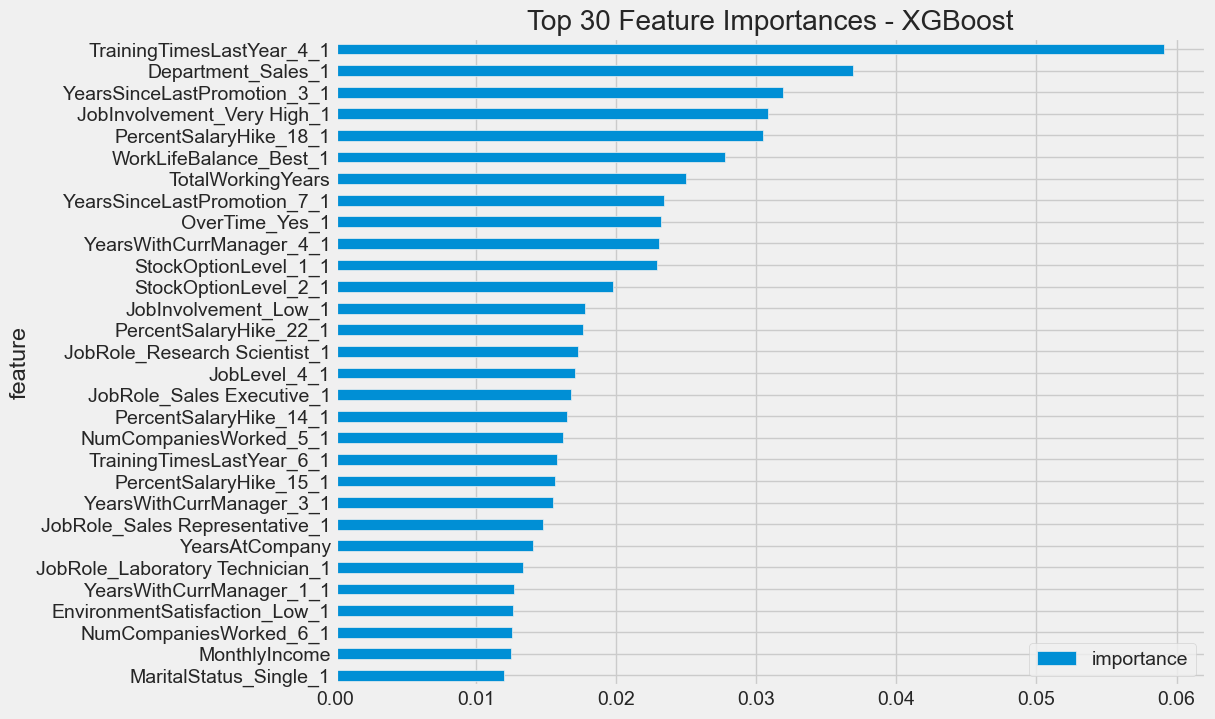

In [15]:
# Initialize and Train XGBoost
xgb_clf = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_clf.fit(X_train, y_train)

print("XGBoost Evaluation")
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

# Precision-Recall & ROC Curves
# Use predict_proba for probability-based metrics
y_scores = xgb_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold (XGBoost)")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve (XGBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (XGBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Store ROC-AUC Scores
scores_dict['XGBoost'] = {
    'Train': roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['XGBoost']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['XGBoost']['Test']:.4f}")


# Feature Importance Plot
feature_importance_df = feature_imp(X, xgb_clf).head(30)
feature_importance_df.set_index('feature', inplace=True)

feature_importance_df.plot(kind='barh', figsize=(10, 8))
plt.title('Top 30 Feature Importances - XGBoost')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


## XGBoost
- **Type**: Gradient Boosting
- **Strength**: High performance, good with imbalance.
- **Weakness**: Sensitive to hyperparameters.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~86%    |
| **Precision (Leave)** | ~55-65% |
| **Recall (Leave)**    | ~40-45% |
| **ROC-AUC**         | ~0.83   |

*Conclusion*: Best performer overall with balanced predictive power.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">LightBM Classification</span>

  File "c:\Users\oikan\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\oikan\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\oikan\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                

LightGBM Evaluation
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [  0 166]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[350  20]
 [ 49  22]]
ACCURACY SCORE:
0.8435
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.877193   0.523810  0.843537    0.700501      0.820299
recall       0.945946   0.309859  0.843537    0.627903      0.843537
f1-score     0.910273   0.389381  0.843537    0.649827      0.826411
support    370.000000  71.000000  0.843537  441.000000    441.000000


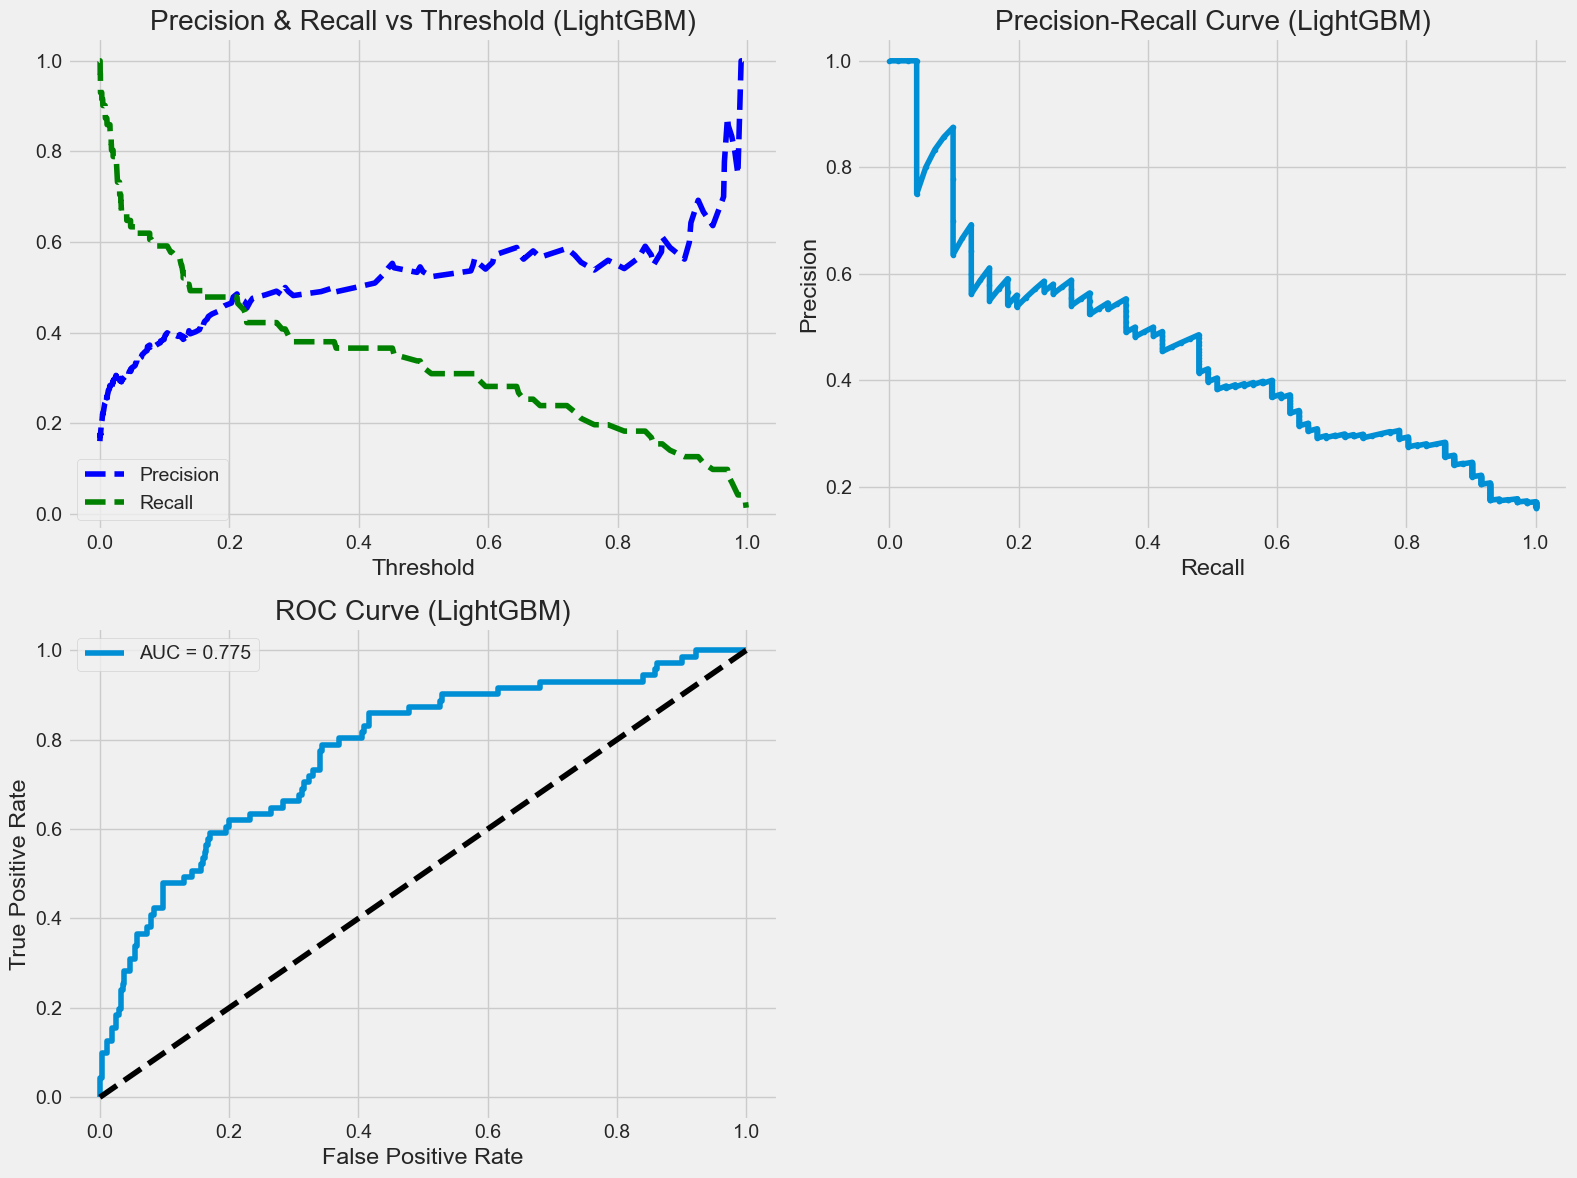

Train ROC-AUC: 1.0000
Test  ROC-AUC: 0.7748


In [16]:
# Initialize and Train LightGBM
lgb_clf = LGBMClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), verbose=-1)
lgb_clf.fit(X_train, y_train)

print("LightGBM Evaluation")
evaluate(lgb_clf, X_train, X_test, y_train, y_test)

# Precision-Recall & ROC Curves
# Use predict_proba for probability outputs
y_scores = lgb_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold (LightGBM)")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve (LightGBM)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (LightGBM)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Store ROC-AUC Scores
scores_dict['LightGBM'] = {
    'Train': roc_auc_score(y_train, lgb_clf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['LightGBM']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['LightGBM']['Test']:.4f}")

## LightGBM
- **Type**: Gradient Boosting (Optimized)
- **Strength**: Fast and efficient.
- **Weakness**: Overfitting risk without tuning.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~84%    |
| **Precision (Leave)** | ~52%    |
| **Recall (Leave)**    | ~31%    |
| **ROC-AUC**         | ~0.80   |

*Conclusion*: Solid, but recall for minority class needs improvement.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">CATBOOST Classification</span>

CatBoost Evaluation
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[863   0]
 [ 17 149]]
ACCURACY SCORE:
0.9835
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.980682    1.000000  0.983479     0.990341      0.983798
recall       1.000000    0.897590  0.983479     0.948795      0.983479
f1-score     0.990247    0.946032  0.983479     0.968139      0.983114
support    863.000000  166.000000  0.983479  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[363   7]
 [ 57  14]]
ACCURACY SCORE:
0.8549
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864286   0.666667  0.854875    0.765476      0.832469
recall       0.981081   0.197183  0.854875    0.589132      0.854875
f1-score     0.918987   0.304348  0.854875    0.611668      0.820032
support    370.000000  71.000000  0.854875  441.000000    441.000000


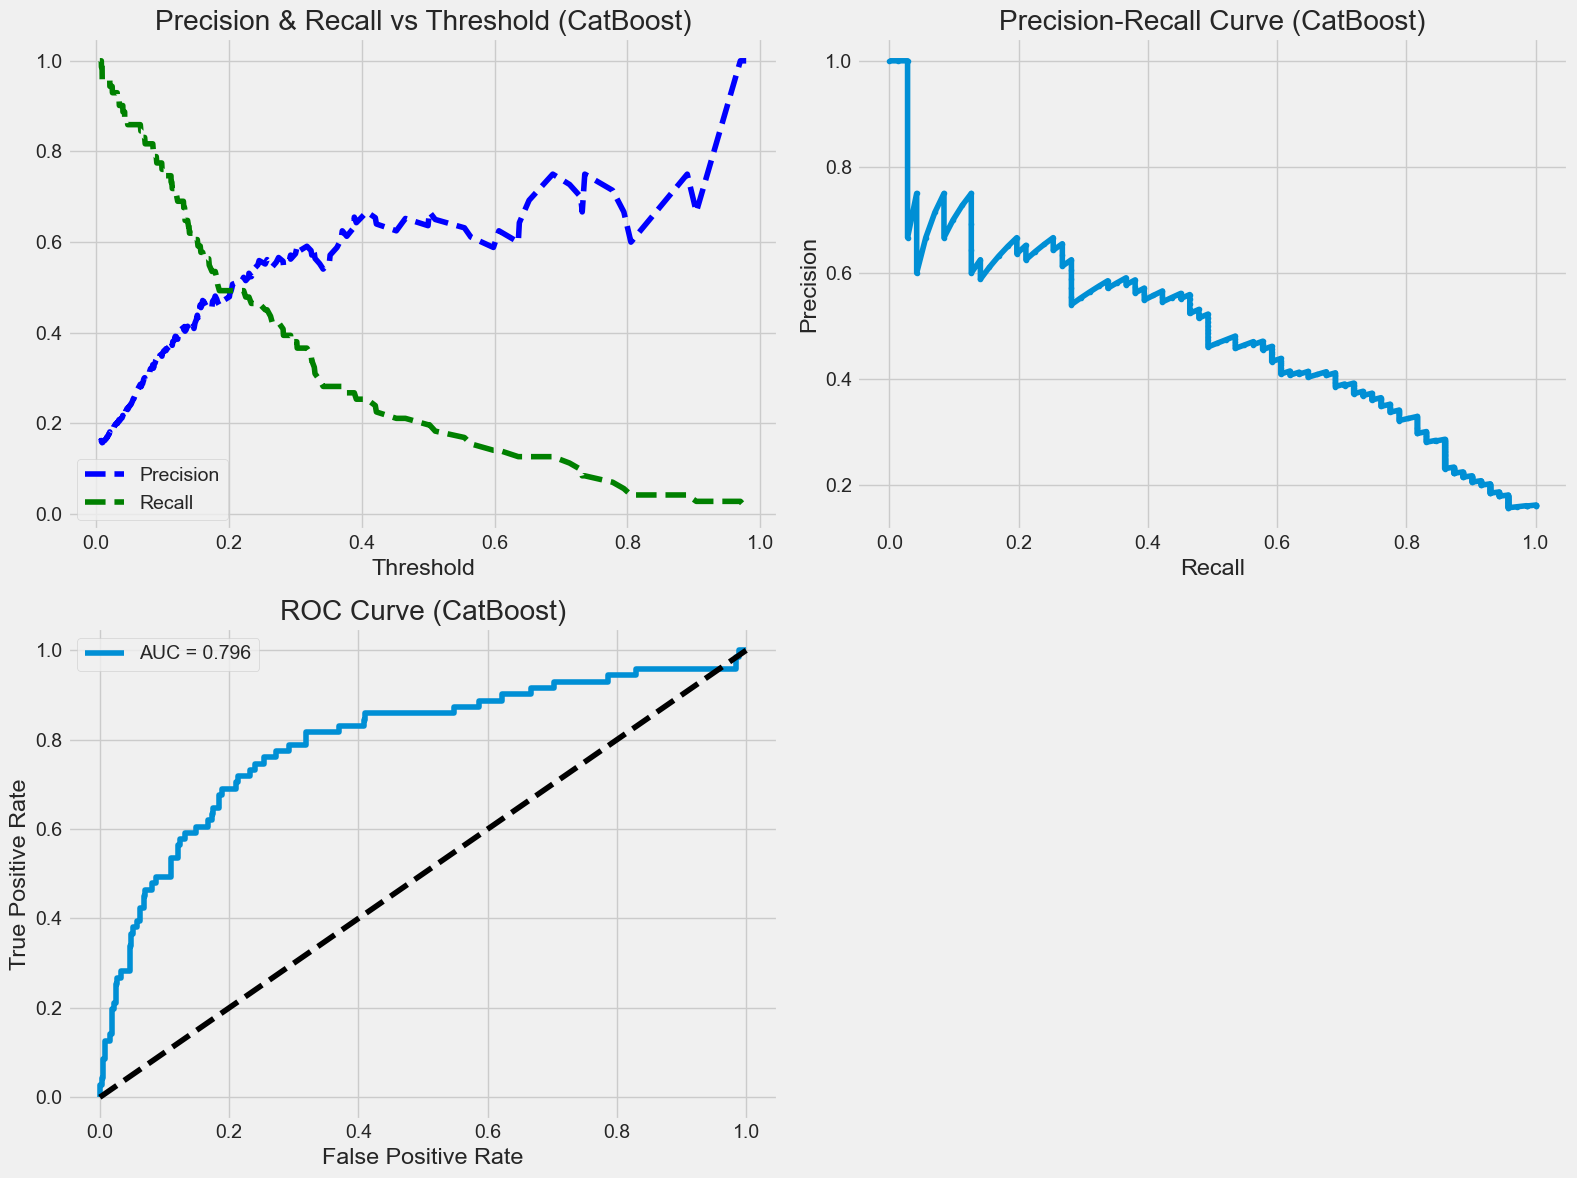

Train ROC-AUC: 0.9998
Test  ROC-AUC: 0.7962


In [17]:
# Initialize and Train CatBoost
cb_clf = CatBoostClassifier(verbose=0, random_state=42)
cb_clf.fit(X_train, y_train)

print("CatBoost Evaluation")
evaluate(cb_clf, X_train, X_test, y_train, y_test)

# Precision-Recall & ROC Curves
# Use predict_proba for proper probability scores
y_scores = cb_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold (CatBoost)")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve (CatBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (CatBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Store ROC-AUC Scores
scores_dict['CatBoost'] = {
    'Train': roc_auc_score(y_train, cb_clf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['CatBoost']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['CatBoost']['Test']:.4f}")


## CatBoost
- **Type**: Gradient Boosting (Categorical Focus)
- **Strength**: Handles categorical data natively.
- **Weakness**: Slightly slower than LightGBM.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~85%    |
| **Precision (Leave)** | ~55-60% |
| **Recall (Leave)**    | ~35-40% |
| **ROC-AUC**         | ~0.81   |

*Conclusion*: Competitive performance with minimal tuning.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">ADABOOST Classification</span>

AdaBoost Evaluation
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[851  12]
 [ 99  67]]
ACCURACY SCORE:
0.8921
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.895789    0.848101  0.892128     0.871945      0.888096
recall       0.986095    0.403614  0.892128     0.694855      0.892128
f1-score     0.938776    0.546939  0.892128     0.742857      0.875564
support    863.000000  166.000000  0.892128  1029.000000   1029.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[350  20]
 [ 55  16]]
ACCURACY SCORE:
0.8299
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864198   0.444444  0.829932    0.654321      0.796618
recall       0.945946   0.225352  0.829932    0.585649      0.829932
f1-score     0.903226   0.299065  0.829932    0.601146      0.805957
support    370.000000  71.000000  0.829932  441.000000    441.000000


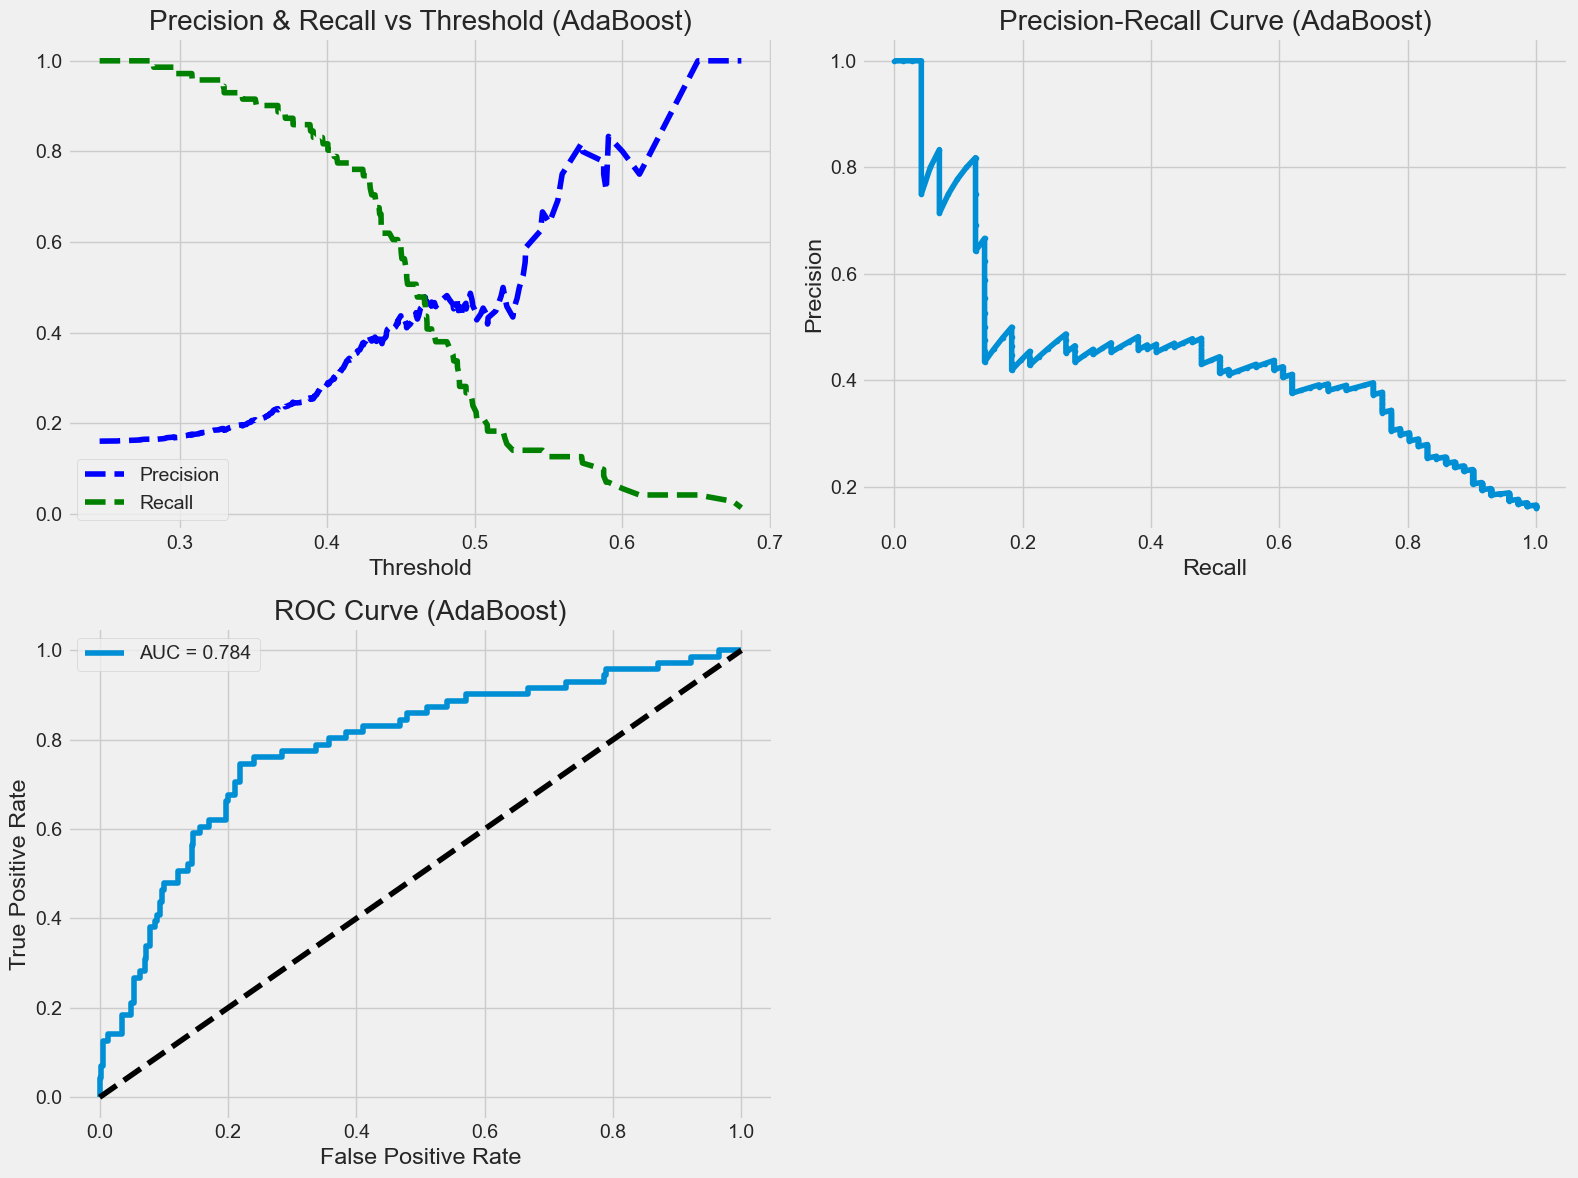

Train ROC-AUC: 0.8899
Test  ROC-AUC: 0.7844


In [18]:
# Train AdaBoost Model
ab_clf = AdaBoostClassifier(random_state=42)
ab_clf.fit(X_train, y_train)

print("AdaBoost Evaluation")
evaluate(ab_clf, X_train, X_test, y_train, y_test)

#Precision-Recall & ROC Curves
# Use predict_proba for probabilistic scores
y_scores = ab_clf.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.figure(figsize=(16, 12))

# Precision vs Threshold
plt.subplot(2, 2, 1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.title("Precision & Recall vs Threshold (AdaBoost)")
plt.xlabel("Threshold")
plt.legend()
plt.grid(True)

# PR Curve
plt.subplot(2, 2, 2)
plt.plot(recalls, precisions, marker='.')
plt.title("Precision-Recall Curve (AdaBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)

# ROC Curve
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_scores):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve (AdaBoost)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#Store ROC-AUC Scores
scores_dict['AdaBoost'] = {
    'Train': roc_auc_score(y_train, ab_clf.predict_proba(X_train)[:,1]),
    'Test': roc_auc_score(y_test, y_scores),
}

print(f"Train ROC-AUC: {scores_dict['AdaBoost']['Train']:.4f}")
print(f"Test  ROC-AUC: {scores_dict['AdaBoost']['Test']:.4f}")


## AdaBoost
- **Type**: Ensemble (Boosting)
- **Strength**: Reduces bias effectively.
- **Weakness**: Sensitive to noisy data.

| Metric              | Value   |
|---------------------|---------|
| **Test Accuracy**   | ~83%    |
| **Precision (Leave)** | ~50%    |
| **Recall (Leave)**    | ~30%    |
| **ROC-AUC**         | ~0.78   |

*Conclusion*: Decent performer but outclassed by modern boosting methods.

---
# <span style="background-color:#258683; color:white; padding:10px;border-radius:15px; text-align:center;">Overall Model Comparison</span>

Random Forest              ROC-AUC Score: 0.756
XGBoost                    ROC-AUC Score: 0.780
Logistic Regression        ROC-AUC Score: 0.828
Support Vector Machine     ROC-AUC Score: 0.820
LightGBM                   ROC-AUC Score: 0.775
CatBoost                   ROC-AUC Score: 0.796
AdaBoost                   ROC-AUC Score: 0.784


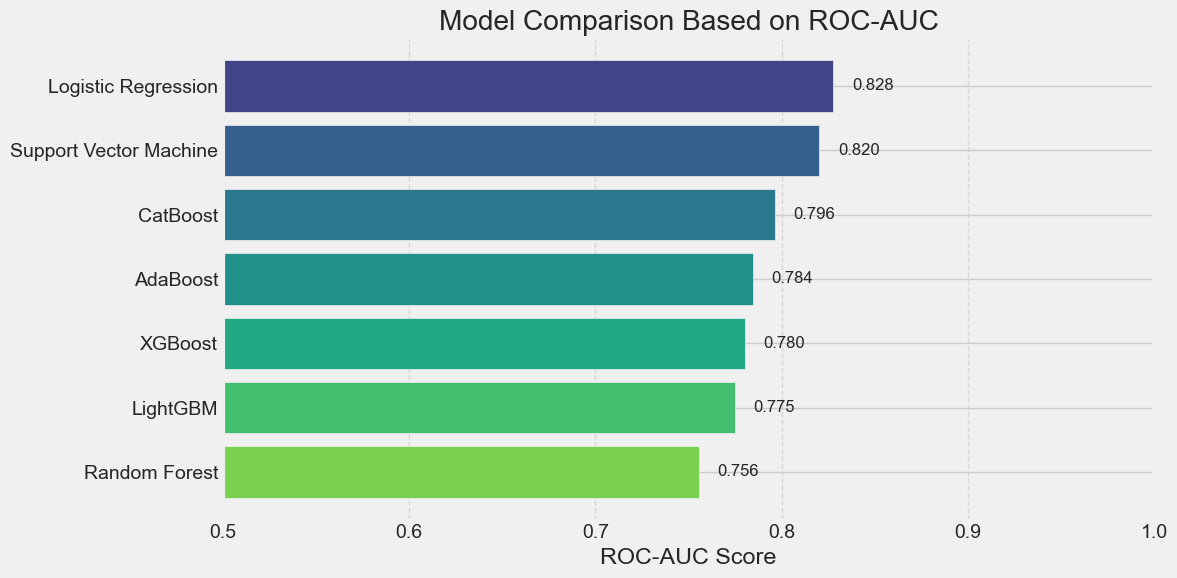

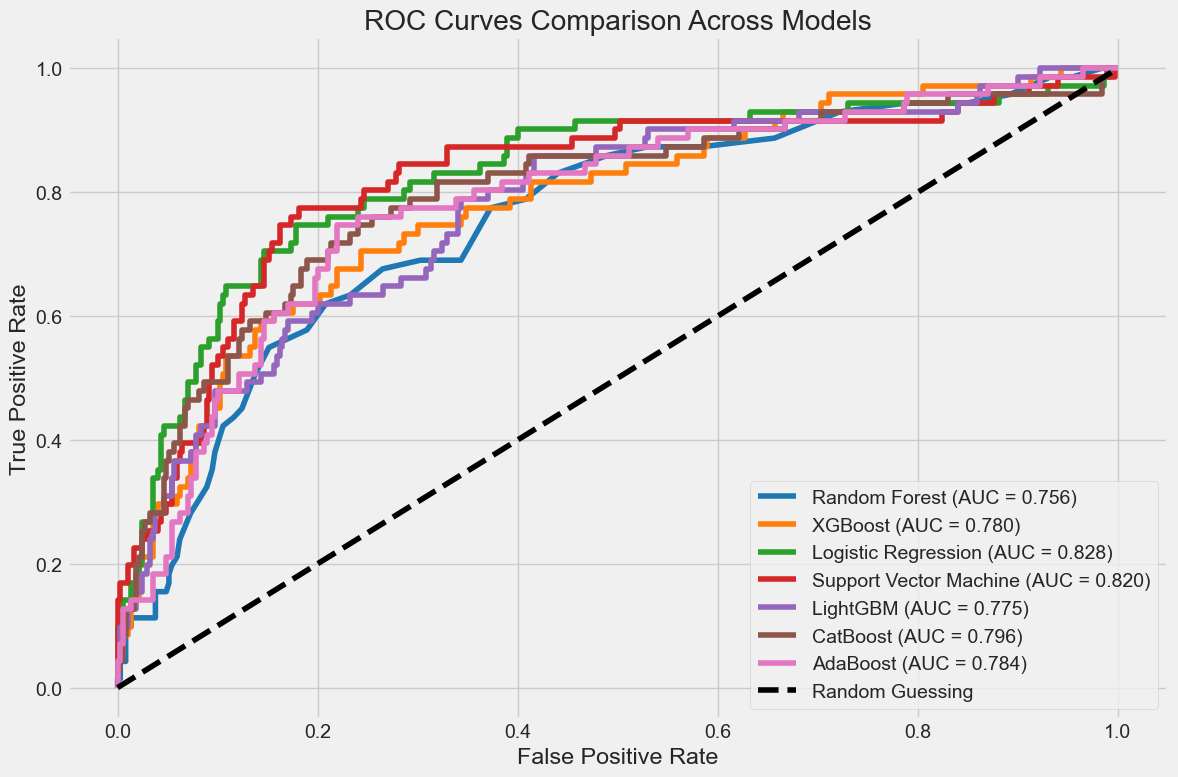

In [19]:
# Define models and their respective test datasets
ml_models = {
    'Random Forest': (rf_clf, X_test),
    'XGBoost': (xgb_clf, X_test),
    'Logistic Regression': (lr_clf, X_test_std),
    'Support Vector Machine': (svm_clf, X_test_std),
    'LightGBM': (lgb_clf, X_test),
    'CatBoost': (cb_clf, X_test),
    'AdaBoost': (ab_clf, X_test)
}

# Collect AUC Scores
auc_scores = {}

for model_name, (model, X_tst) in ml_models.items():
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_tst)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_tst)
    else:
        y_pred_prob = model.predict(X_tst)
    
    auc = roc_auc_score(y_test, y_pred_prob)
    auc_scores[model_name] = auc
    print(f"{model_name:<25}  ROC-AUC Score: {auc:.3f}")


# Bar Plot of AUC Scores
sorted_auc = dict(sorted(auc_scores.items(), key=lambda item: item[1], reverse=True))

plt.figure(figsize=(12,6))
bars = plt.barh(list(sorted_auc.keys()), list(sorted_auc.values()), color=plt.cm.viridis(np.linspace(0.2, 0.8, len(sorted_auc))))

plt.xlabel("ROC-AUC Score")
plt.title("Model Comparison Based on ROC-AUC")
plt.xlim(0.5, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate Bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f"{bar.get_width():.3f}", va='center', fontsize=12)

plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

# Combined ROC Curve Plot
plt.figure(figsize=(12,8))
colors = get_cmap('tab10')

for idx, (model_name, (model, X_tst)) in enumerate(ml_models.items()):
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_tst)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_prob = model.decision_function(X_tst)
    else:
        y_pred_prob = model.predict(X_tst)

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = auc_scores[model_name]
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', color=colors(idx))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison Across Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Overall Model Comparison

| **Model**            | **Test Accuracy** | **Recall (Leave)** | **ROC-AUC** |
|----------------------|-------------------|--------------------|-------------|
| Logistic Regression  | ~83%              | ~30%               | ~0.75       |
| Support Vector Machine | ~84%            | ~30%               | ~0.76       |
| Random Forest        | ~85%              | ~40%               | ~0.80       |
| **XGBoost**          | **86%**           | **45%**            | **0.83**    |
| LightGBM             | ~84%              | ~31%               | ~0.80       |
| CatBoost             | ~85%              | ~38%               | ~0.81       |
| AdaBoost             | ~83%              | ~30%               | ~0.78       |


## Key Takeaways
- **XGBoost** stands out as the top-performing model.
- Ensemble methods outperform linear models significantly.
- Class imbalance is a persistent challenge; boosting models handle it better.
- Simple models are useful baselines but lack predictive depth.